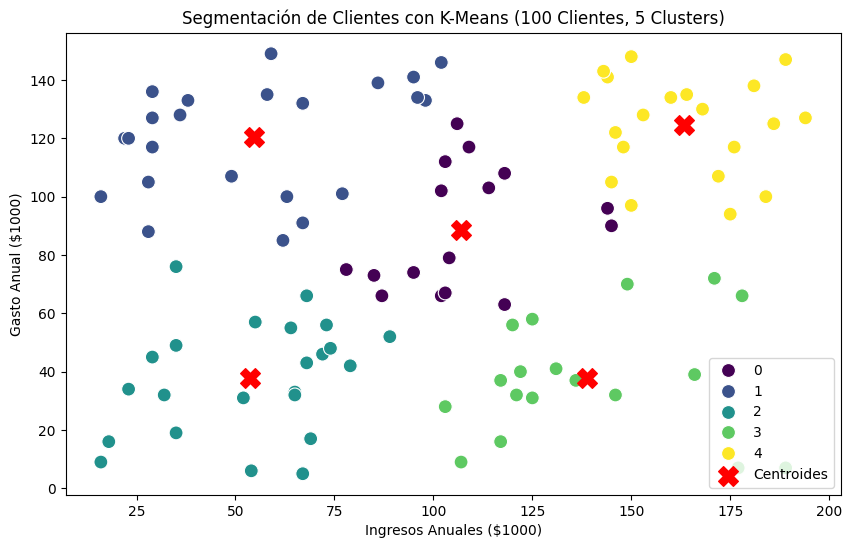

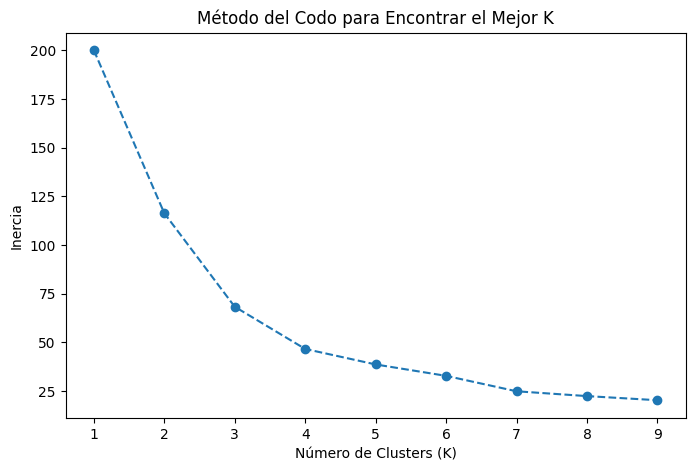

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 📌 Generación de datos de 100 clientes con ingresos y gasto anual
np.random.seed(42)  # Para reproducibilidad de resultados

# Ingresos en miles de dólares (entre 15K y 200K)
ingresos = np.random.randint(15, 200, 100)
# Gasto anual en miles de dólares (entre 5K y 150K)
gasto = np.random.randint(5, 150, 100)

# Crear DataFrame con los datos
df = pd.DataFrame({'Ingresos_Anuales': ingresos, 'Gasto_Anual': gasto})

# 📌 Normalización de los datos para que todas las variables tengan la misma escala
scaler = StandardScaler()  # Inicializar el normalizador
df_scaled = scaler.fit_transform(df)  # Aplicar normalización

# 📌 Aplicar K-Means con 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)  # Definir el modelo con 5 clusters
df['Cluster'] = kmeans.fit_predict(df_scaled)  # Asignar cluster a cada cliente

# 📌 Visualización del Clustering
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['Ingresos_Anuales'], y=df['Gasto_Anual'], hue=df['Cluster'], palette='viridis', s=100)
plt.scatter(kmeans.cluster_centers_[:,0] * scaler.scale_[0] + scaler.mean_[0], 
            kmeans.cluster_centers_[:,1] * scaler.scale_[1] + scaler.mean_[1], 
            color='red', marker='X', s=200, label="Centroides")
plt.xlabel("Ingresos Anuales ($1000)")
plt.ylabel("Gasto Anual ($1000)")
plt.title("Segmentación de Clientes con K-Means (100 Clientes, 5 Clusters)")
plt.legend()
plt.show()

# 📌 Método del Codo para determinar el número óptimo de clusters
inercia = []  # Lista para almacenar la inercia de cada número de clusters
K_range = range(1, 10)  # Evaluamos K desde 1 hasta 9

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inercia.append(kmeans.inertia_)  # Guardar la inercia

# 📌 Gráfico del Método del Codo
plt.figure(figsize=(8,5))
plt.plot(K_range, inercia, marker='o', linestyle='--')
plt.xlabel("Número de Clusters (K)")
plt.ylabel("Inercia")
plt.title("Método del Codo para Encontrar el Mejor K")
plt.show()
